<a href="https://colab.research.google.com/github/inokchoi/Speech/blob/main/STFT_MEL_MFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Analysis

## 1. Recording

#### - Step 1: Install Audacity: https://www.audacityteam.org/download/
#### - Step 2: Record the sentence and save it into a file

## 2. Plot Signal

### Note: You need to install 'librosa' and 'matplot' libraries.

## A. Import required packages

In [ ]:
# Import required packages.
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/20-1voice_interface/Proj1/'

/content/drive/My Drive/Colab Notebooks/20-1voice_interface/Proj1


## B. Read speech data

In [ ]:
# Set the directory path of the data directory.
audio_path = './data/'

# Load a waveform.
xn_org, sf_org = librosa.load(audio_path+'2019451129_test.wav', sr=16000) #녹음
#sf, xn_org = wavfile.read(audio_path+'input.wav')          #원래 포맷

print(f'sampling rate : {sf_org}')
print(f'length of signal : {len(xn_org)/sf_org:.2f} seconds')

sampling rate : 16000
length of signal : 6.13 seconds


## C. Plot and play the signal

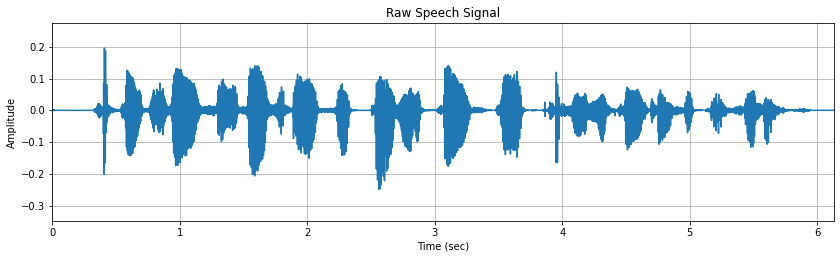

In [ ]:
# Define a function to plot a time-domain signal.
def plot_signal(signal, sf):
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(211)
    ax.set_title('Raw Speech Signal')
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amplitude')
    ax.grid(True)
    N = len(signal)
    nx = np.linspace(0, N/sf, N)    
    ax.plot(nx, signal)
    ax.set_xlim(nx.min(), nx.max())
    ax.set_ylim(signal.min()*1.4, signal.max()*1.4)
    
    # Plot the designated time segment.
#     start_time, end_time = 0.4, 1.0
#     ax.set_xlim(start_time, end_time)
#     start_idx, end_idx = int(start_time*sf), int(end_time*sf)
#     ymin, ymax = signal[start_idx:end_idx].min(), signal[start_idx:end_idx].max()
#     ax.set_ylim(ymin*1.4, ymax*1.4)
    
# Plot the signal.
plot_signal(xn_org, sf_org)

In [ ]:
import IPython.display as ipd

# Play the speech signal.
ipd.Audio(xn_org, rate=sf_org)

## 3. Downsampling

In [ ]:
# Perform downsampling to 16 and 8 kHz.
xn16khz = librosa.resample(xn_org, sf_org, 16000)
xn8khz = librosa.resample(xn_org, sf_org, 8000)
#ipd.Audio(xn16khz, rate=16000)
#ipd.Audio(xn8khz, rate=8000)

In [ ]:
# Compare the length of input and downsampled signals.
xn_length = len(xn_org)
xn16khz_length = len(xn16khz)
xn8khz_length = len(xn8khz)
print(xn_length, xn16khz_length, xn8khz_length)

98081 98081 49041


## 4. Signal spectrum

In [ ]:
# Choose the sampling frequency of input signal to process.
sampling_freq = 16000

# Choose an input signal depending on the pre-defined sampling frequency.
if sampling_freq == 44100:
    xn = xn_org    
elif sampling_freq == 16000:
    xn = xn16khz
elif sampling_freq == 8000:
    xn = xn8khz
else:
    print(f'Unsupported sampling frequency : {sampling_freq}')
    raise StopIteration    

### A. Cut short-time segment

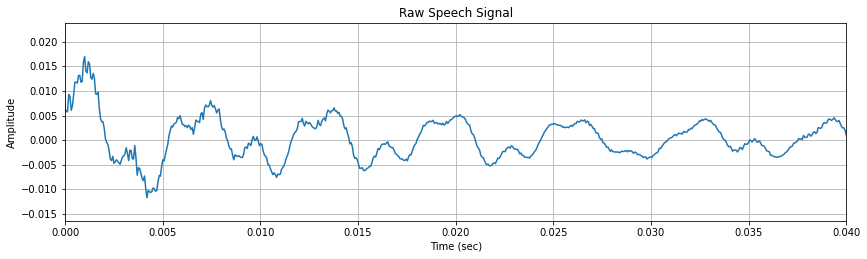

In [ ]:
# Cut short-time segment.
def cut_segment(sn, start_position_second, sampling_rate, length_sec):
    nx = int(start_position_second * sampling_rate)
    ny = int(length_sec * sampling_rate)
#    print(nx, ny)
    return sn[nx:nx+ny]

# Define the start time and length of signal (second) to use.
start_time, length = 0.7, 0.04   #타임도메인에서 시간을 그리기 위해서!
sn = cut_segment(xn, start_time, sampling_freq, length)

# Plot the segmented time domain signal.
plot_signal(sn, sampling_freq)

In [ ]:
#내 목소리 표본 주파수를 구하면
#1/X.XXX
1/0.007 #hz

142.85714285714286

In [ ]:
len(sn) # 8000 * 0.04 = 320

640

### B. Magnitude spectrum

In [ ]:
#fft: 푸리에트랜스폼

In [ ]:
from scipy.fftpack import fft

# Perform FFT with a windowed signal.
sn_win = sn * np.hanning(len(sn)) #해닝을 안곱하면 아래 이미지가 모양이 더 촘촘해보임.
#왜 그러냐하면, 
#sn_win = wn으로 해보기
#일부 왜곡은 생기지만 주파수 도메인 특성이 더 좋게 나온다.
#간섭을 최소화하는 것이다.

fft_size = pow(2, int(np.log2(len(sn_win)))+1) # power of 2
#320에 로그 씌우고, 2승 해주면 512가 된다.
Sw = fft(sn_win, fft_size) #복소수가 나온다. --> abs해서 mag를 구한다.(아래)

# Compute magnitude and log-magnitude spectrum.
half_fft_size = int(fft_size / 2) + 1 #절반만 사용한다. (뒤에가 똑같으므로)
mag_Sw = abs(Sw[:half_fft_size]) #복소수(complex --> mag)
logmag_Sw = 20 * np.log10(mag_Sw)  #20은 db의 정의이다.

In [ ]:
fft_size

1024

In [ ]:
len(Sw)

1024

In [ ]:
#512개의 값으로 나온다. --> 실제로는 절반만 필요하므로,
#Sw[:half_fft_size]

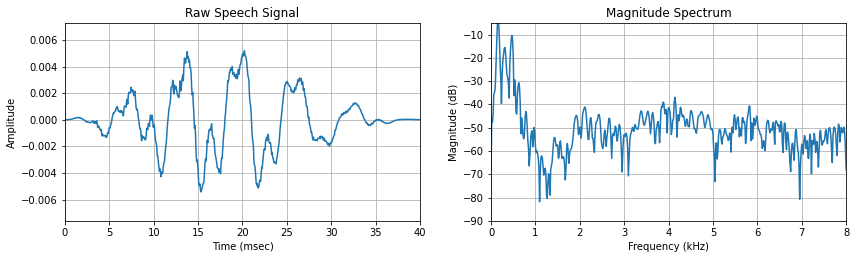

In [ ]:
# Plot signal waveform and log-magnitude spectrum.
def plot_signal_spectrum(signal, logmag_sw, sf):
    fig = plt.figure(figsize=(14, 8))
    ax1 = fig.add_subplot(221)
    ax1.set_title('Raw Speech Signal')
    ax1.set_xlabel('Time (msec)')
    ax1.set_ylabel('Amplitude')
    ax1.grid(True)
    N = len(signal)
    nx = np.linspace(0, N/(sf*0.001), N)
    ax1.set_xlim(nx.min(), nx.max())
    ax1.set_ylim(signal.min()*1.4, signal.max()*1.4)    
    ax1.plot(nx, signal)
    
    ax2 = fig.add_subplot(222)
    ax2.set_title('Magnitude Spectrum')
    ax2.set_xlabel('Frequency (kHz)')
    ax2.set_ylabel('Magnitude (dB)')
    ax2.grid(True)
    NF = len(logmag_sw)
    nx2 = np.linspace(0, (sf/2*0.001), NF) #샘플링 절반이므로 /2
    ax2.set_xlim(nx2.min(), nx2.max())
    ax2.set_ylim(logmag_sw.min()*1.1, logmag_sw.max()*1.4)     
    ax2.plot(nx2, logmag_sw) 
    
# Plot the signal in the time and frequency domain.
plot_signal_spectrum(sn_win, logmag_Sw, sampling_freq)

In [ ]:
#왼쪽 그림:타임 도메인  / 오른쪽 그림:magnitude
#행인 윈도우          / FFT 후 mag 그리면 오른쪽 그림 (절반만 그림)
#절반을 안그리면?
#왼쪽 주파수를 --> 오른쪽은 주파수를 분리한 것

#주파수 도메인: 신호 분리
#타임도메인보다 정보를 더 많이 얻을 수 있다.
#최근에는 타임 도메인만 하는 경우도 있지만 메인은 아니다.
#위와 같은게 음성에서는 일반적이다.

#스팩트로그램: 3차원으로 그리는 것

### C. Spectrogram

#### [STFT and Spectrogram]

In [ ]:
# Compute short time Fourier transformation (STFT).
def stft(sig, nfft, win_length_time, hop_length_time, fs, window_type='hann'):
    win_sample = int(win_length_time * fs)
    hop_sample = int(hop_length_time * fs)

    if window_type == 'hann':
        window = np.hanning(win_sample)
    elif window_type == 'hamming':
        window = np.hamming(win_sample)
    else:
        print('Wrong window type : {}'.format(window_type))
        raise StopIteration
        
    n_frames = int(np.floor((len(sig) - win_sample) / float(hop_sample)) + 1) #전체 프레임 갯수
    frames = np.stack([window * sig[step*hop_sample : step*hop_sample + win_sample] for step in range(n_frames)])
    
    stft = np.fft.rfft(frames, n = nfft, axis=1) #numpy에도 fft가 있따. real fft
    return stft

# Plot spectrogram.
def plot_spectrogram(spec, title, sr, type='spectrogram'):    
    plt.title(title)
    if type == 'spectrogram':
        ny = np.arange(0, spec.shape[-1], step=spec.shape[-1]/(sr//2000))
        ny_value = ["{}".format(int(x)) for x in np.arange(0,sr//2,1000)]
        plt.yticks(ny, ny_value)
        plt.ylabel('Frequency [Hz]')
    elif type == 'mel_spectrogram':
        plt.ylabel('The number of mel filterbanks')
    elif type == 'mfcc':
        plt.ylabel('The number of coefficients')
    plt.xlabel('The number of frames')
    plt.imshow(spec.transpose(), cmap='jet', origin='lowest', aspect='auto')
    plt.colorbar()
    plt.show()

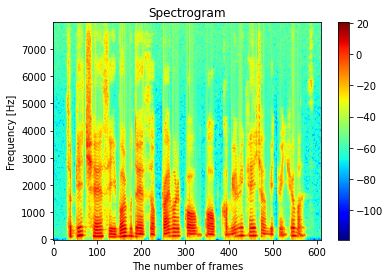

In [ ]:
# Compute STFT for the input speech signal. 
nfft = 512
frame_length = 0.04    # analysis frame length (seconds) 40ms
shift_length = 0.01    # shift length (seconds) 10ms
#길게 length를 가져가면 ? 0.05, 0.01 해보기, 
spectrogram = stft(xn, nfft, frame_length, shift_length, sampling_freq, 'hann')
mag = abs(spectrogram)
log_mag = 20 * np.log10(mag + 1.0e-10)

# Plot log-spectrogram.
plot_spectrogram(log_mag, 'Spectrogram', sampling_freq) 

In [ ]:
np.shape(spectrogram)

(610, 257)

In [ ]:
#(274, 257) //274는 녹음 길이다.
#시간축, (512 / 2 + 1)

In [ ]:
#샘플링을 8000으로 해서 그림이 4000으로 된다.
#진하게 표시된 부분

#### [Mel-filterbank and MFCC]

In [ ]:
import scipy

# Obtain mel-scale filterbank.
def get_melfb(sr, nfft, n_mels):
    mel_fb = librosa.filters.mel(sr, n_fft=nfft, n_mels=n_mels)
    return mel_fb

# Compute log mel spectrogram.
def compute_log_melspectrogram(spec, sr, nfft, n_mels):
    mel_fb = get_melfb(sr, nfft, n_mels)
    power_spec = mag**2
    mel_spec = np.matmul(power_spec, mel_fb.transpose())
    mel_spec = 10*np.log10(mel_spec) #log a의 제곱은 10이 된다. (위 mag**2)?
    return mel_spec

# Compute MFCC.
def compute_mfcc(spec, sr, nfft, n_mels,n_mfcc):
    mel_spec = compute_log_melspectrogram(spec,sr, nfft, n_mels)
    mfcc = scipy.fftpack.dct(mel_spec, axis=-1, norm='ortho')
    return mfcc[:,:n_mfcc]

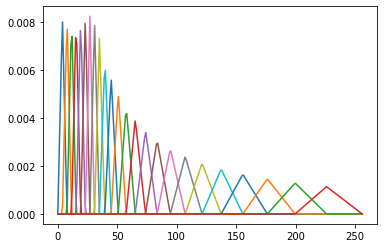

In [ ]:
# Get mel filterbank.
num_of_mel_fb = 24
mel_fb = get_melfb(sampling_freq, nfft, n_mels=num_of_mel_fb)

# Check the mel filter bank.
for i in range(len(mel_fb)):
    plt.plot(mel_fb[i])
plt.show()
plt.close()

In [ ]:
#색깔이 주파수다. 멜밴드라고 한다.
#낮으면 샤프하다가 높은 주파수일수록 넓어진다.


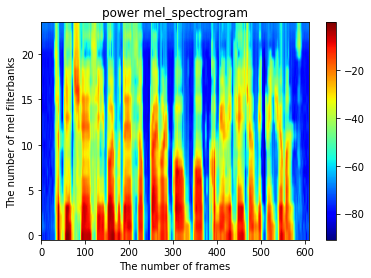

In [ ]:
# Compute log mel spectrogram and plot it.
num_of_mfcc = 13 #17 등 디멘젼을 조절해보자.
logmel_spec = compute_log_melspectrogram(mag, sampling_freq, nfft, n_mels=num_of_mel_fb)
plot_spectrogram(logmel_spec, 'power mel_spectrogram',sampling_freq, type='mel_spectrogram')

In [ ]:
#왜? 사람은 멜 필터 뱅크를 많이 쓴다.


In [ ]:
np.shape(logmel_spec)

(610, 24)

In [ ]:
#멜 필터 뱅크 구하고 DCT를 하면 MFCC가 된다.
#scipy.fftpack.dct --> 차원이 더 낮아진다.
#낮은 쪽에 보컬 트래픽이 더 많다.

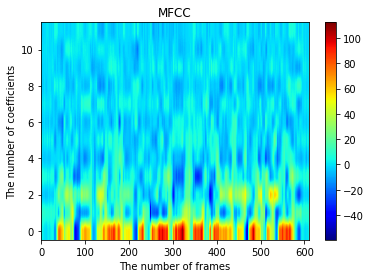

In [ ]:
# Compute MFCC and plot it.
num_of_mfcc = 13
mfcc = compute_mfcc(mag, sampling_freq, nfft, n_mels=num_of_mel_fb, n_mfcc=num_of_mfcc)
plot_spectrogram(mfcc[:,1:], 'MFCC', sampling_freq, type='mfcc')

In [ ]:
np.shape(mfcc)

(610, 13)

## 5. Save data into binary files

In [ ]:
#원하는 인풋 데이터를 저장해놓는다.
#바이너리 파일로

#이 피쳐를 읽어서 (아래 코드)

#트레이닝 할 때 읽어서 트레이닝을 진행한다.

In [ ]:
import pickle

# Write features into files.
with open("input.lmfe", "wb") as f:
    pickle.dump(logmel_spec, f)
    
with open("input.mfcc", "wb") as f:
    pickle.dump(mfcc, f)

# Read features from files.
#with open("input.lmfe", "rb") as f:
#    logmel_spec_in = pickle.load(f)       
#with open("input.mfcc", "rb") as f:
#    mfcc_in = pickle.load(f)    

In [ ]:
#노이즈를 줄이려면
#speech enhance (noise reduct)

In [ ]:
#화자인식: context window 사용한다. (다음주)
#한 프레임이 있다면(n) 주변에 있는 데이터까지 다 쓰는것(n-1, n+1),,,등

#화자인식, 음성인식 둘다

#1024 의미?
#예를 들어 320이었다면 320보다 큰 2의 n승을 찾는다.
#fft: 원래 사이즈보다 큰 2의 n승으로 해라.

#40ms인데 8khz이면, 1024, 512 둘다 된다.
#1024 쓰면 513dl ehlslRk, 4khz를 513로 자르므로 분해능? 이 좋다.
#8hzㅈ씩 볼꺼냐, 16hz만큼 볼꺼냐


#sp.shape(spectram)값이 1926, 513이라면
#1926 의미는 19.26초를 저장했다. 한개가 10ms마다 했다는 의미
#513은 1024 / 2 + 1을 한 것


In [ ]:
#메그니튜드 스펙트럼 의미--> 얼만큼의 에너지가 있는지이다.

In [ ]:
#frame_length : 프레임의 길이다.
#한번 FFT하겠다는 길이

#shift length (hop - length) - 10ms
#frame length - 20~30

In [ ]:
#stft: 
#ft는 한개, 전부 다를 얻는것이 stft이다.

In [ ]:
#웨이블렛, stft 차이점
#시간축 - 길다., 주파수 - 짧다. : 장점: 신호 처리 특성을 잘 표현할 수 있다. FT보다 더 좋은 성능

#필터 나눌 때 바운더리에 align 문제가 있다.
#핕터 설계가 어렵다.
